# Error Estimator directly from json File

## Load json data for RF and XGB

In [174]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_evaluation import flatten_data
import numpy as np
#from utils_evaluation import flatten_data, generate_hyperparameter_combinations_dict, descreptives, save_results_to_csv, csv_to_list, flatten_nested_lists, error_estimator, grouped_bar_plot_hyperparameters
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_rf = pd.DataFrame(data_all_flatten)
print('Shape of data', df_rf.shape)
print('Colum names of data', df_rf.columns)
print('Number of Colums', df_rf.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_rf.astype(str).duplicated().sum())


df_rf.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [175]:
#### Second: XGBoost
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/xgb/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_xgb = pd.DataFrame(data_all_flatten)
print('Shape of data', df_xgb.shape)
print('Colum names of data', df_xgb.columns)
print('Number of Colums', df_xgb.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_xgb.astype(str).duplicated().sum())


df_xgb.head()

Shape of data (4800, 87)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_max_depth,unstratified_best_params_learning_rate,unstratified_best_params_gamma,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree
0,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.000000,0.687279,0.847472,2,2,0.311333,1.000000,0.982669
1,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,3.786479,0.982669,0.729761,6,2,0.222667,3.786479,0.982669
2,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,1.945888,0.548831,0.997877,2,2,0.222667,1.000000,0.585893
3,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.945888,0.982669,0.997877,4,2,0.134000,1.000000,0.517950
4,xgb,200,100000,8,0,identity,5,5,200,20,...,17,0.178333,1.394951,0.976185,0.697330,6,3,0.222667,1.394951,0.548831


In [176]:
data = pd.concat([df_rf, df_xgb], axis=0, ignore_index=True)
original_shape = data.shape[0]


(9600, 99)
(6866, 99)


In [183]:
exclude_hyp_dame = False
if exclude_hyp_dame:
    data = data[data['hyperparameters_same'] == False]
    data = data.reset_index(drop=True) #reset index of data
    print('Original shape: ', original_shape)
    print('Shape after removing hyperparameters that are the same: ', data.shape[0])
    print('Percetage', data.shape[0]/original_shape)
    data.head()
 

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree,param_model,error_estimator_stratified,error_estimator_unstratified
0,rf,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rf_200_0_identity_5_5,"[-1.1924014679282937, -1.5338435020818695, -1....","[-1.580345819699338, -2.1192987424120346, -1.6..."
1,rf,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rf_200_0_identity_5_5,"[-1.0459522557943393, -0.963737199770744, -0.7...","[-1.0388543485350805, -0.960397868431051, -1.0..."
2,rf,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rf_200_0_identity_5_5,rf_200_0_identity_5_5,rf_200_0_identity_5_5
3,rf,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rf_200_0_identity_5_5,rf_200_0_identity_5_5,rf_200_0_identity_5_5
4,rf,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rf_200_0_identity_5_5,rf_200_0_identity_5_5,rf_200_0_identity_5_5


In [184]:
moel_vars = ['model_info_model',	'model_info_n_train',	'model_info_noise',	'model_info_transformation',	'model_info_group_size',	'model_info_n_folds']

data['param_model'] = data.loc[:, moel_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (6866, 102)


0    rf_200_0_identity_5_5
1    rf_200_0_identity_5_5
2    rf_200_0_identity_5_5
3    rf_200_0_identity_5_5
4    rf_200_0_identity_5_5
Name: param_model, dtype: object

In [185]:
# Display unique values for each column with counts
model_info = ['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size']
for column in model_info:
    unique_values = data[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
xgb    3711
rf     3155
Name: count, dtype: int64


model_info_n_train
200     3775
1000    3091
Name: count, dtype: int64


model_info_n_test
100000    6866
Name: count, dtype: int64


model_info_n_features
8    6866
Name: count, dtype: int64


model_info_noise
3    3959
0    2907
Name: count, dtype: int64


model_info_transformation
log         2355
sqrt        2265
identity    2246
Name: count, dtype: int64


model_info_group_size
10    3435
5     3431
Name: count, dtype: int64



Add colum with calculated error_estimator_stratified and their mean over the Random Search Iteratons:


In [186]:
data['error_estimator_stratified'] = data['param_model'] 
data['error_estimator_unstratified'] = data['param_model'] 

for i in range(len(data)):
    # Note: cv_stratified_iterations_mean_test_score is negagtive MSE, wherase cv_iteration_refit_test_mse is absolute MSE
    # generalisation error: stratified
    data['error_estimator_stratified'][i] =  [x + y for x, y in zip(data['cv_stratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]
    # generalisation error: unstratified
    data['error_estimator_unstratified'][i]   = [x + y for x, y in zip(data['cv_unstratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]

print(len(data['error_estimator_stratified'][0]))
print(len(data['error_estimator_stratified']))


data['error_estimator_mean_stratified'] = data['error_estimator_stratified'].apply(lambda x: np.mean(x))
data['error_estimator_mean_unstratified'] = data['error_estimator_unstratified'].apply(lambda x: np.mean(x))

200
6866


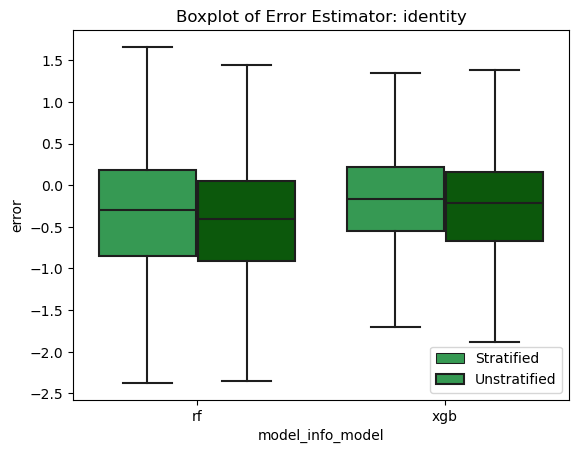

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     rf     stratified -0.335636  1.092022
1                                     rf   unstratified -0.483809  1.137236
2                                    xgb     stratified -0.169283  0.952516
3                                    xgb   unstratified -0.287627  0.973638


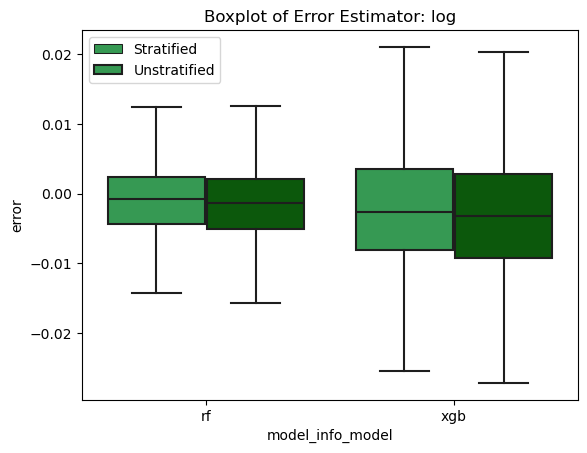

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     rf     stratified -0.001418  0.007637
1                                     rf   unstratified -0.002176  0.007778
2                                    xgb     stratified -0.002183  0.011757
3                                    xgb   unstratified -0.003308  0.012018


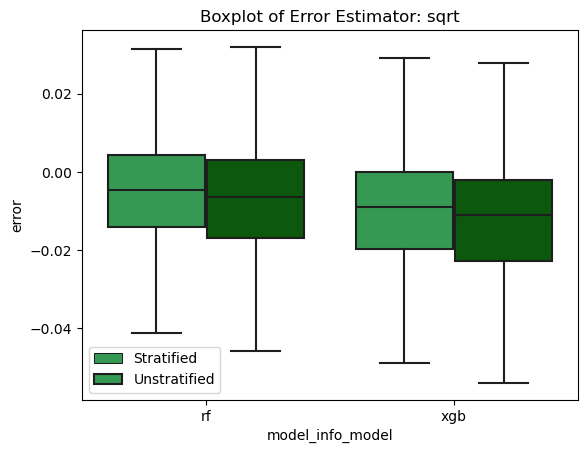

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     rf     stratified -0.005268  0.018739
1                                     rf   unstratified -0.007542  0.019130
2                                    xgb     stratified -0.009811  0.022330
3                                    xgb   unstratified -0.013055  0.022938


In [192]:
transformations = data['model_info_transformation'].unique()


for transformation in transformations:
    data_error= data[data['model_info_transformation'] == transformation]
    # make data long
    data_error_long = data_error.melt(id_vars=['model_info_model'], 
                                               value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                               var_name='stratification', value_name='error')

    plt.title('Boxplot of Error Estimator: ' + transformation)
    sns.boxplot(x=data_error_long['model_info_model'], 
                y=data_error_long['error'], 
                hue=data_error_long['stratification'], 
                palette=['#26A94C', 'darkgreen'],
                showfliers=False, )  # hide outliers
    plt.legend(labels=['Stratified', 'Unstratified'])
    plt.show()

    # check N per boxplot
    grouped = data_error_long.groupby(['model_info_model', 'stratification'])
    grouped.size().reset_index(name='counts')
    data.groupby(['model_info_model', 'model_info_transformation']).size().reset_index(name='counts')
    # Deacreptive table
    descriptives = grouped.describe()
    keys = descriptives['error']['mean'].keys()
    descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('model_info_model'), 
                                       'Stratification': keys.get_level_values('stratification').str.rsplit('_', n=1).str[-1], 
                                       'Mean': descriptives['error']['mean'].values, 
                                       'SD': descriptives['error']['std'].values})
    print(descriptives_table)


Boxplots per unique experimental parameter combination comparing strativied vs. unstratified: 

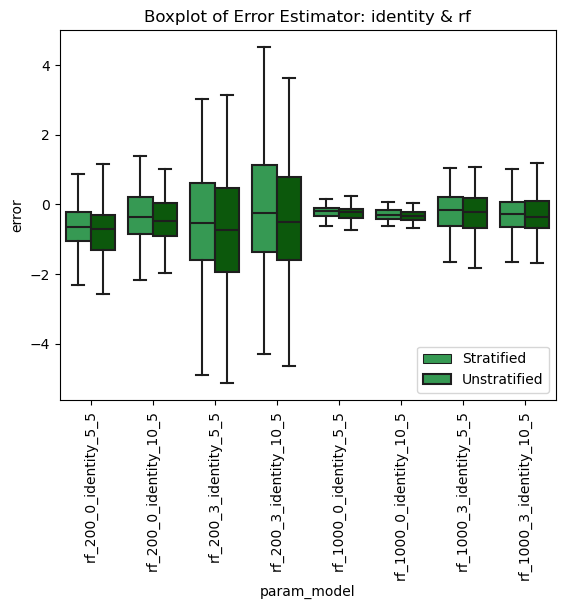

   Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                 rf_1000_0_identity_10_5     stratified -0.295979  0.176278
1                 rf_1000_0_identity_10_5   unstratified -0.333811  0.183428
2                  rf_1000_0_identity_5_5     stratified -0.230041  0.188450
3                  rf_1000_0_identity_5_5   unstratified -0.248945  0.190650
4                 rf_1000_3_identity_10_5     stratified -0.262416  0.550604
5                 rf_1000_3_identity_10_5   unstratified -0.321851  0.562588
6                  rf_1000_3_identity_5_5     stratified -0.186745  0.565285
7                  rf_1000_3_identity_5_5   unstratified -0.249506  0.570130
8                  rf_200_0_identity_10_5     stratified -0.313725  0.731632
9                  rf_200_0_identity_10_5   unstratified -0.457889  0.718096
10                  rf_200_0_identity_5_5     stratified -0.607943  0.752738
11                  rf_200_0_identity_5_5   unstratified -0.739813  0.786014

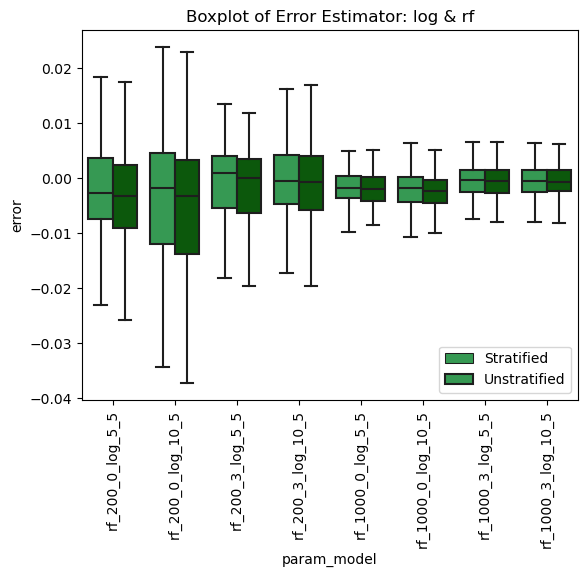

   Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                      rf_1000_0_log_10_5     stratified -0.001950  0.003347
1                      rf_1000_0_log_10_5   unstratified -0.002440  0.003351
2                       rf_1000_0_log_5_5     stratified -0.001529  0.003132
3                       rf_1000_0_log_5_5   unstratified -0.001917  0.003138
4                      rf_1000_3_log_10_5     stratified -0.000745  0.003216
5                      rf_1000_3_log_10_5   unstratified -0.000911  0.003372
6                       rf_1000_3_log_5_5     stratified -0.000595  0.003094
7                       rf_1000_3_log_5_5   unstratified -0.000867  0.003165
8                       rf_200_0_log_10_5     stratified -0.003146  0.011603
9                       rf_200_0_log_10_5   unstratified -0.004788  0.011927
10                       rf_200_0_log_5_5     stratified -0.002525  0.010502
11                       rf_200_0_log_5_5   unstratified -0.003763  0.010644

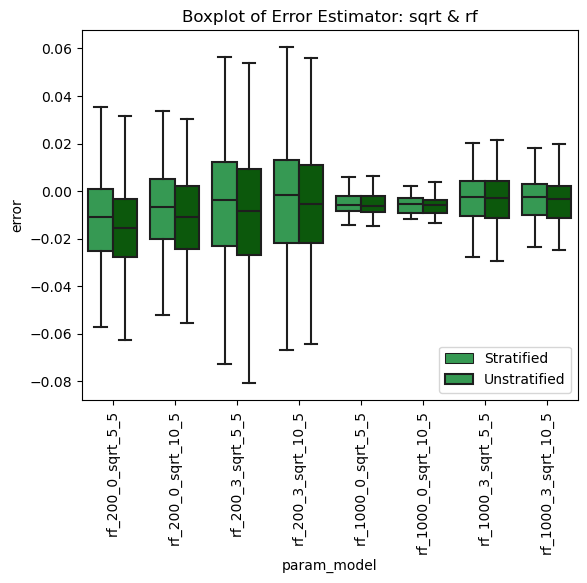

   Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                     rf_1000_0_sqrt_10_5     stratified -0.005467  0.004197
1                     rf_1000_0_sqrt_10_5   unstratified -0.006039  0.004318
2                      rf_1000_0_sqrt_5_5     stratified -0.005400  0.004302
3                      rf_1000_0_sqrt_5_5   unstratified -0.005861  0.004327
4                     rf_1000_3_sqrt_10_5     stratified -0.003472  0.009523
5                     rf_1000_3_sqrt_10_5   unstratified -0.004089  0.009817
6                      rf_1000_3_sqrt_5_5     stratified -0.002660  0.009717
7                      rf_1000_3_sqrt_5_5   unstratified -0.003371  0.009877
8                      rf_200_0_sqrt_10_5     stratified -0.006896  0.017564
9                      rf_200_0_sqrt_10_5   unstratified -0.010524  0.017526
10                      rf_200_0_sqrt_5_5     stratified -0.010749  0.016580
11                      rf_200_0_sqrt_5_5   unstratified -0.015441  0.017266

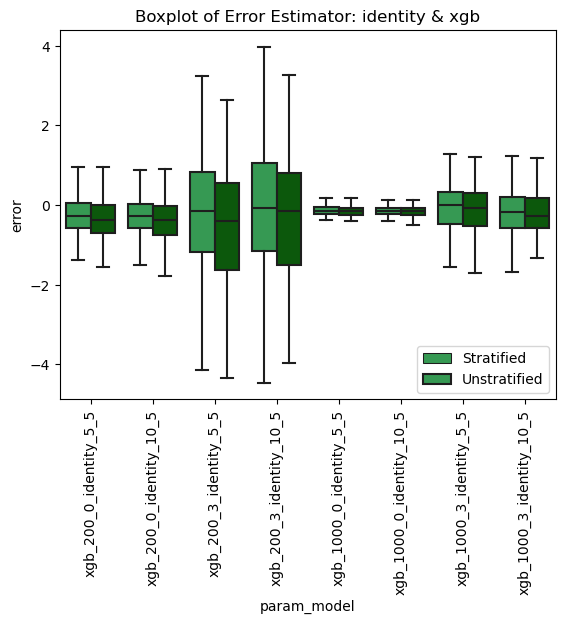

   Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                xgb_1000_0_identity_10_5     stratified -0.140525  0.117322
1                xgb_1000_0_identity_10_5   unstratified -0.155962  0.124279
2                 xgb_1000_0_identity_5_5     stratified -0.136172  0.127790
3                 xgb_1000_0_identity_5_5   unstratified -0.156766  0.132823
4                xgb_1000_3_identity_10_5     stratified -0.173891  0.596825
5                xgb_1000_3_identity_10_5   unstratified -0.218889  0.589837
6                 xgb_1000_3_identity_5_5     stratified -0.072971  0.573788
7                 xgb_1000_3_identity_5_5   unstratified -0.097993  0.582287
8                 xgb_200_0_identity_10_5     stratified -0.284306  0.522581
9                 xgb_200_0_identity_10_5   unstratified -0.381060  0.521679
10                 xgb_200_0_identity_5_5     stratified -0.277103  0.490746
11                 xgb_200_0_identity_5_5   unstratified -0.385852  0.491409

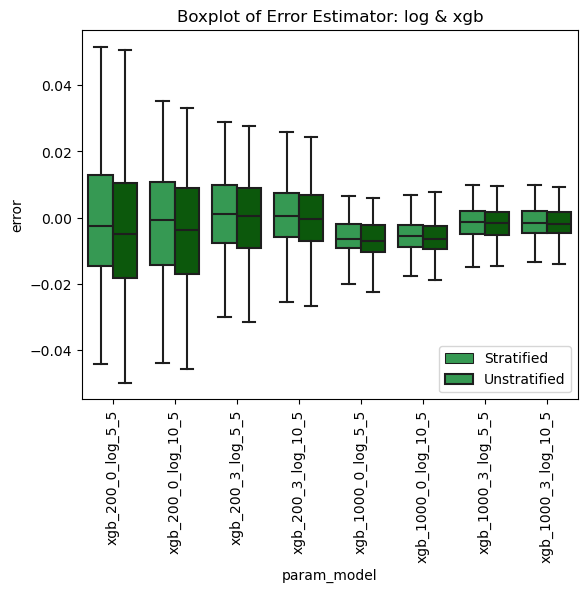

   Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                     xgb_1000_0_log_10_5     stratified -0.005699  0.005025
1                     xgb_1000_0_log_10_5   unstratified -0.006211  0.005163
2                      xgb_1000_0_log_5_5     stratified -0.005874  0.005604
3                      xgb_1000_0_log_5_5   unstratified -0.006493  0.005786
4                     xgb_1000_3_log_10_5     stratified -0.001553  0.004889
5                     xgb_1000_3_log_10_5   unstratified -0.001785  0.004951
6                      xgb_1000_3_log_5_5     stratified -0.001615  0.004904
7                      xgb_1000_3_log_5_5   unstratified -0.001887  0.004941
8                      xgb_200_0_log_10_5     stratified -0.002203  0.017318
9                      xgb_200_0_log_10_5   unstratified -0.004752  0.017762
10                      xgb_200_0_log_5_5     stratified -0.000928  0.019243
11                      xgb_200_0_log_5_5   unstratified -0.003388  0.019915

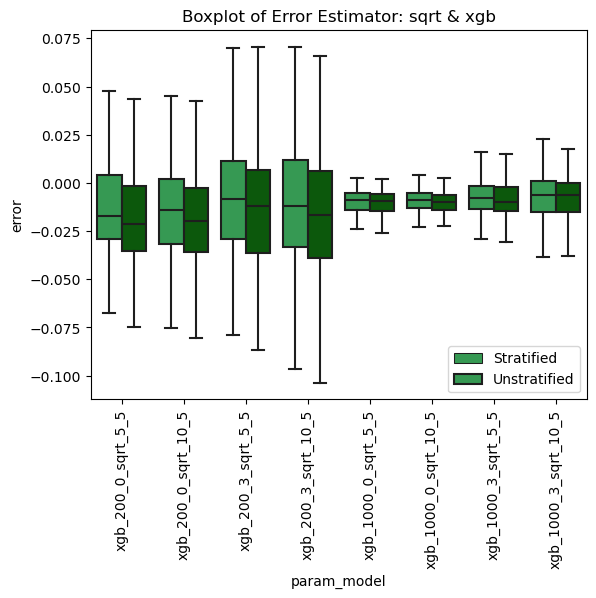

   Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                    xgb_1000_0_sqrt_10_5     stratified -0.009180  0.005881
1                    xgb_1000_0_sqrt_10_5   unstratified -0.010097  0.006032
2                     xgb_1000_0_sqrt_5_5     stratified -0.009153  0.006074
3                     xgb_1000_0_sqrt_5_5   unstratified -0.010094  0.006256
4                    xgb_1000_3_sqrt_10_5     stratified -0.006283  0.011569
5                    xgb_1000_3_sqrt_10_5   unstratified -0.006999  0.011571
6                     xgb_1000_3_sqrt_5_5     stratified -0.006760  0.010553
7                     xgb_1000_3_sqrt_5_5   unstratified -0.007954  0.010650
8                     xgb_200_0_sqrt_10_5     stratified -0.013647  0.025224
9                     xgb_200_0_sqrt_10_5   unstratified -0.018626  0.025845
10                     xgb_200_0_sqrt_5_5     stratified -0.013365  0.024504
11                     xgb_200_0_sqrt_5_5   unstratified -0.018509  0.024975

In [188]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()
differences_table_all = pd.DataFrame()

for model in models: 
    for transformation in transformations:
       
        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                var_name='stratification', value_name='error')
        data_error_long.groupby(['param_model', 'stratification'])
        data_error_long.sort_values(['param_model'])  
        
        #plot
        plt.title('Boxplot of Error Estimator: ' + transformation + ' & ' + model)
        sns.boxplot(x=data_error_long['param_model'], 
                    y=data_error_long['error'], 
                    hue=data_error_long['stratification'], 
                    palette=['#26A94C', 'darkgreen'],
                    showfliers=False, )  # hide outliers
        plt.legend(labels=['Stratified', 'Unstratified'], loc='lower right')
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.show()

        # check N per boxplot
        grouped = data_error_long.groupby(['param_model', 'stratification'])
        grouped.size().reset_index(name='counts')
        data.groupby(['model_info_model', 'model_info_transformation']).size().reset_index(name='counts')
        # Deacreptive table
        descriptives = grouped.describe()
        keys = descriptives['error']['mean'].keys()
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                           'Stratification': keys.get_level_values('stratification').str.rsplit('_', n=1).str[-1], 
                                           'Mean': descriptives['error']['mean'].values, 
                                           'SD': descriptives['error']['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                           'Difference Mean': difference_mean, 
                                           'Difference SD': difference_sd})
        differences_table_all = pd.concat([differences_table_all, differences])
        print(descriptives_table)
        print(differences)   




In [202]:
print(differences_table_all[0:2].to_latex(index=False, caption='Descriptive Table of Error Estimator', label='tab:descriptive_table'))

\begin{table}
\caption{Descriptive Table of Error Estimator}
\label{tab:descriptive_table}
\begin{tabular}{lrr}
\toprule
Expermintel Hyperparameter Combinaiton & Difference Mean & Difference SD \\
\midrule
rf_1000_0_identity_10_5 & 0.037832 & -0.007150 \\
rf_1000_0_identity_5_5 & 0.018905 & -0.002200 \\
\bottomrule
\end{tabular}
\end{table}



In [201]:
from tabulate import tabulate

# Assuming your data is stored in a DataFrame called df
latex_table = tabulate(differences_table_all, tablefmt="latex_raw", headers="keys", showindex=False)
print(latex_table)

\begin{tabular}{lrr}
\hline
 Expermintel Hyperparameter Combinaiton   &   Difference Mean &   Difference SD \\
\hline
 rf_1000_0_identity_10_5                  &       0.037832    &    -0.00715005  \\
 rf_1000_0_identity_5_5                   &       0.0189047   &    -0.00220029  \\
 rf_1000_3_identity_10_5                  &       0.0594348   &    -0.0119846   \\
 rf_1000_3_identity_5_5                   &       0.0627612   &    -0.00484478  \\
 rf_200_0_identity_10_5                   &       0.144164    &     0.0135356   \\
 rf_200_0_identity_5_5                    &       0.13187     &    -0.0332758   \\
 rf_200_3_identity_10_5                   &       0.311755    &    -0.0715      \\
 rf_200_3_identity_5_5                    &       0.24484     &    -0.0651362   \\
 rf_1000_0_log_10_5                       &       0.000489667 &    -3.30587e-06 \\
 rf_1000_0_log_5_5                        &       0.000388044 &    -6.68977e-06 \\
 rf_1000_3_log_10_5                       &       0.